# K- Means Clustering

**This notebook will walk through some of the basics of K-Means Clustering.**

# **Pankaj Dubey**

## Importing all libraries

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
%matplotlib notebook

## Loading the data

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Shape of data
iris_df.shape

(150, 4)

In [5]:
# Description about the data
iris_df.describe(include = "all")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


<IPython.core.display.Javascript object>


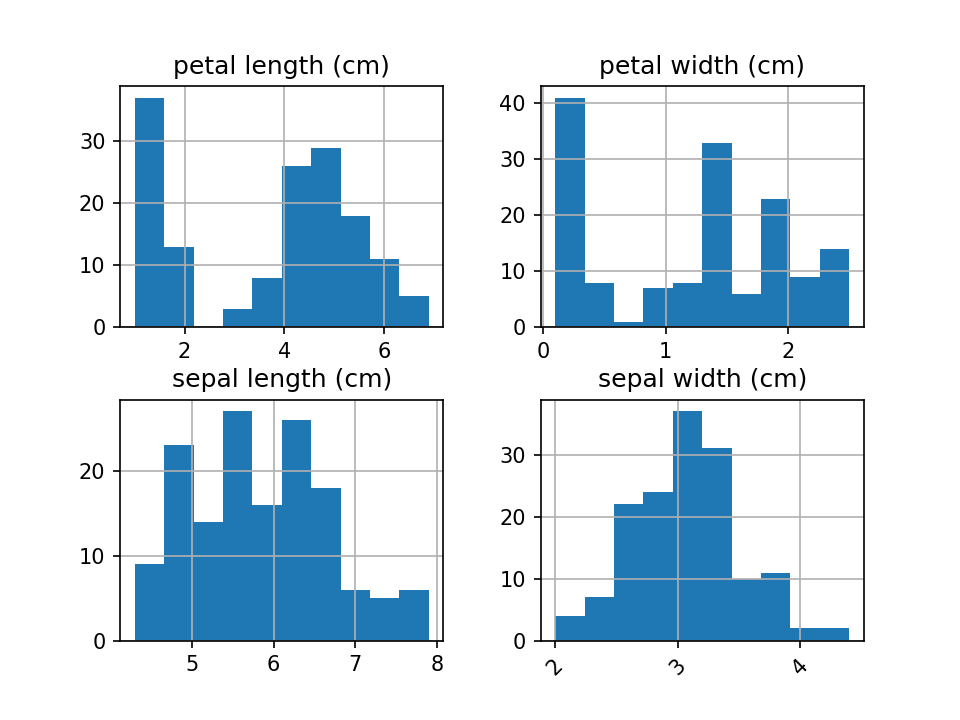

In [7]:
iris_df.hist()
ax = plt.gca().xaxis
for items in ax.get_ticklabels():
    items.set_rotation(45)

plt.subplots_adjust()
plt.show()

<IPython.core.display.Javascript object>


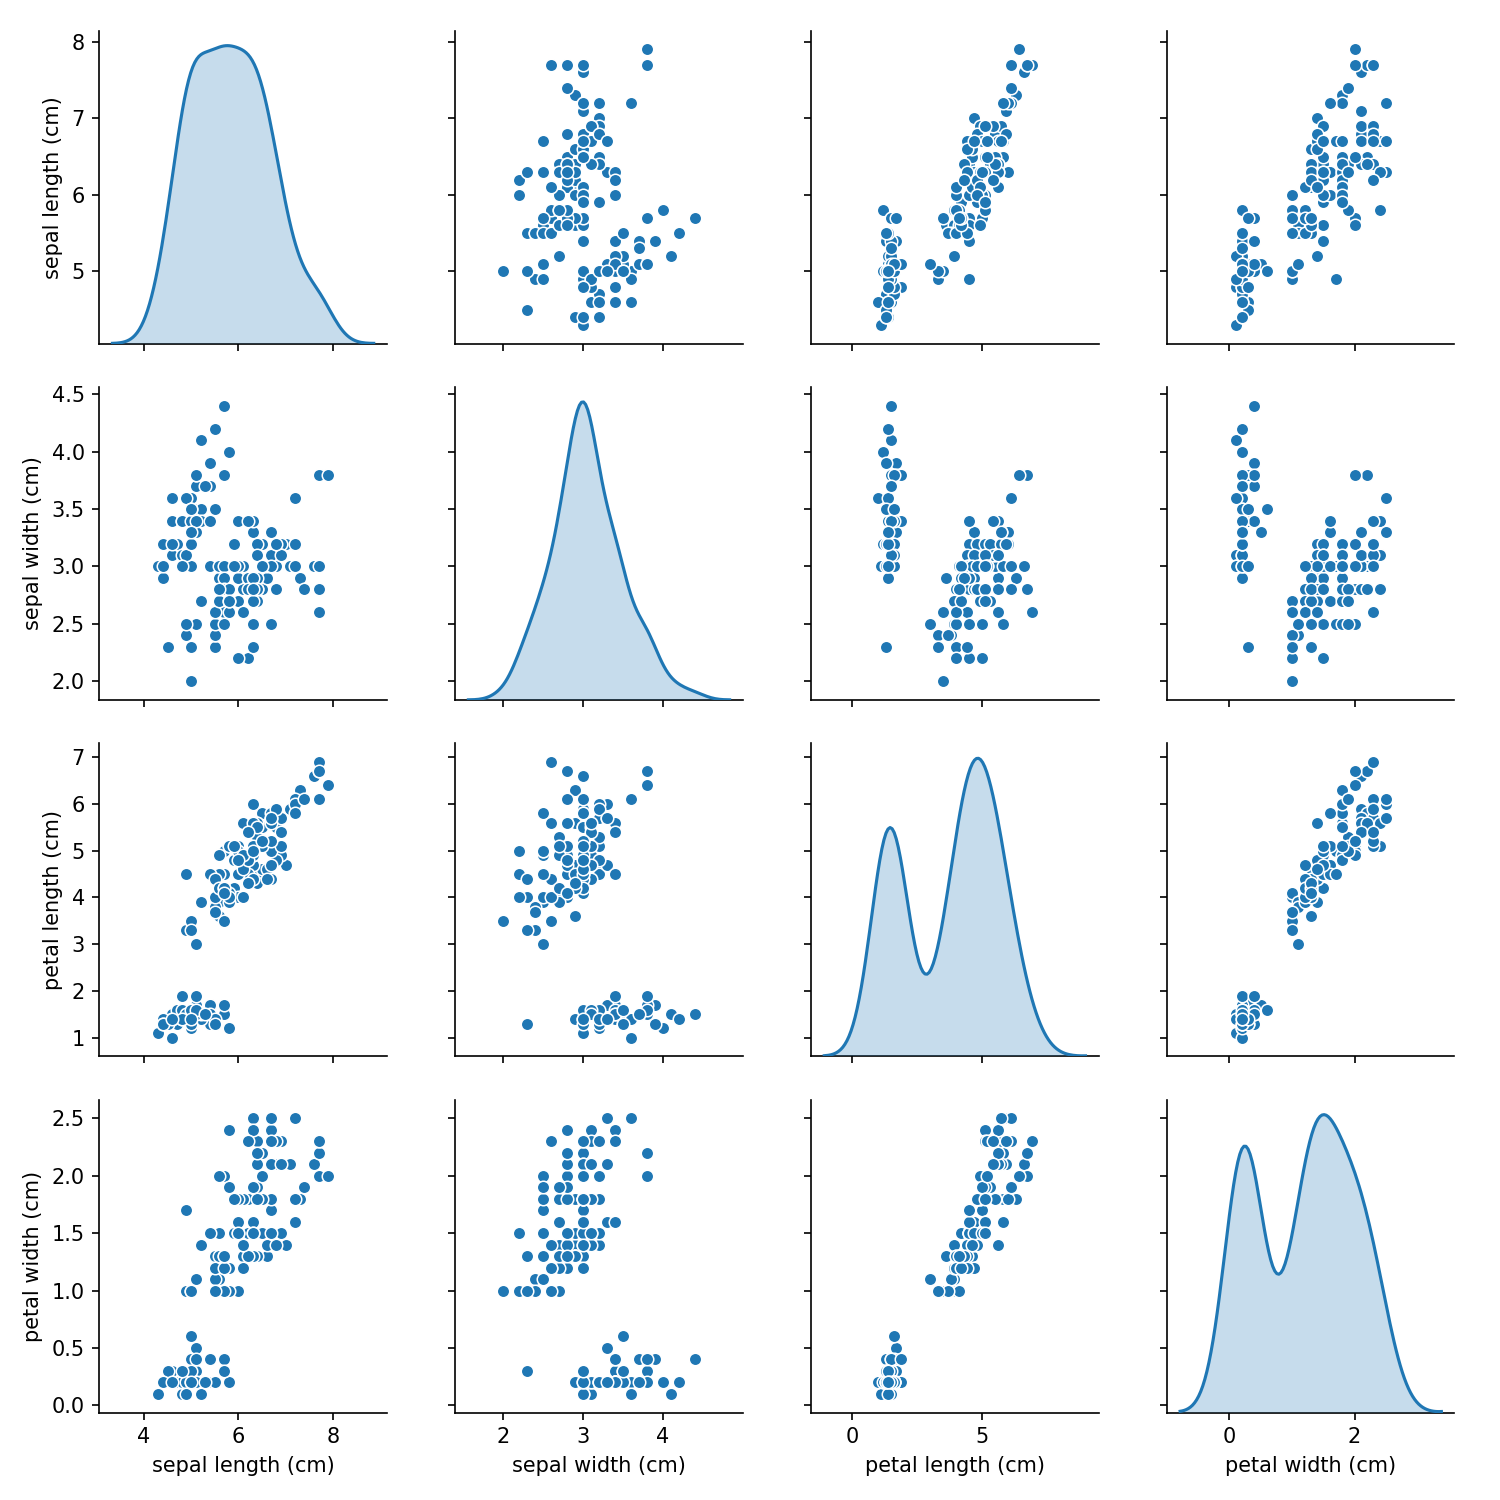

In [8]:
sns.pairplot(iris_df,diag_kind='kde')

## Let's find out optimum number of clusters for K Means From Elbow Method

<IPython.core.display.Javascript object>


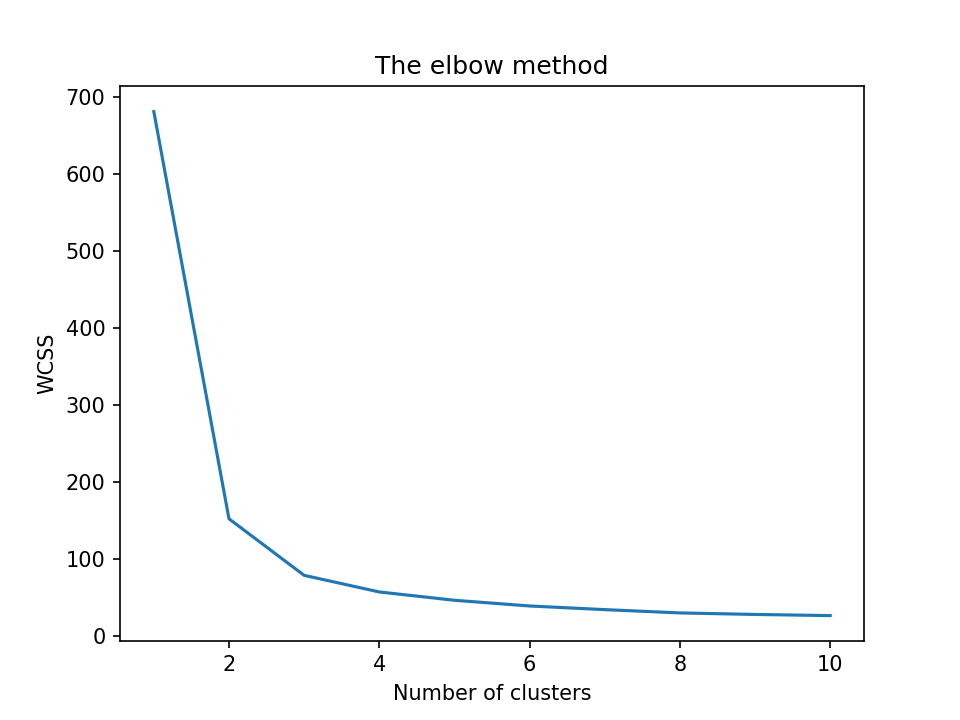

In [9]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

**From this we choose the number of clusters as ** '3**'.

##  Applying the kmeans algorithm

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Let's Visualise them

<IPython.core.display.Javascript object>


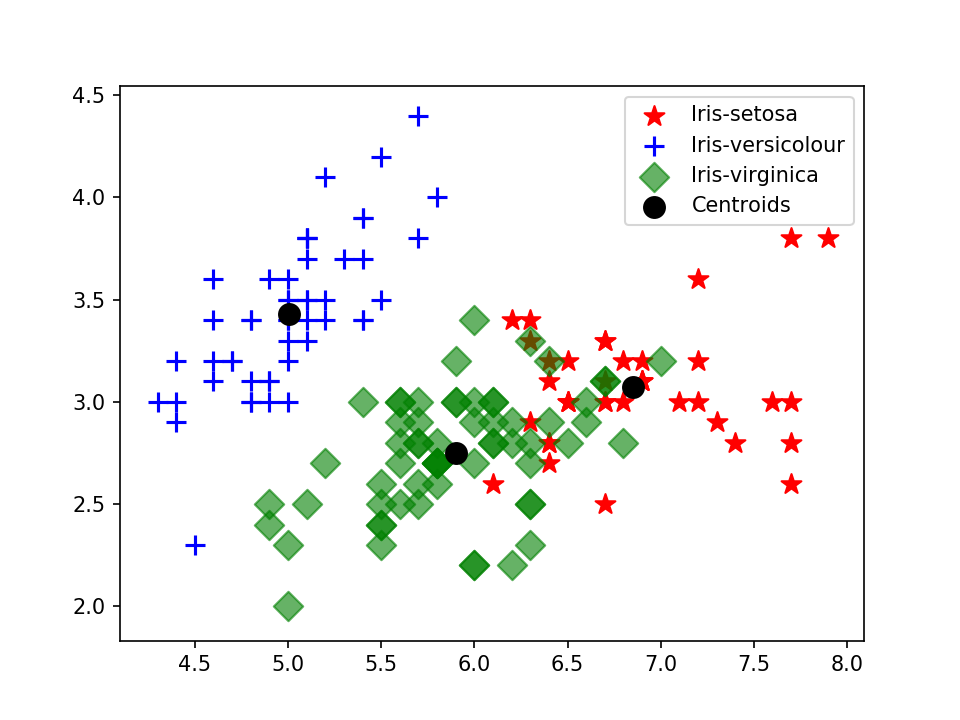

In [11]:
# Visualising the clusters - On the first two columns
plt.figure()
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa',marker = '*')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour',marker = '+')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica',marker = 'D',alpha = 0.6)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

<IPython.core.display.Javascript object>


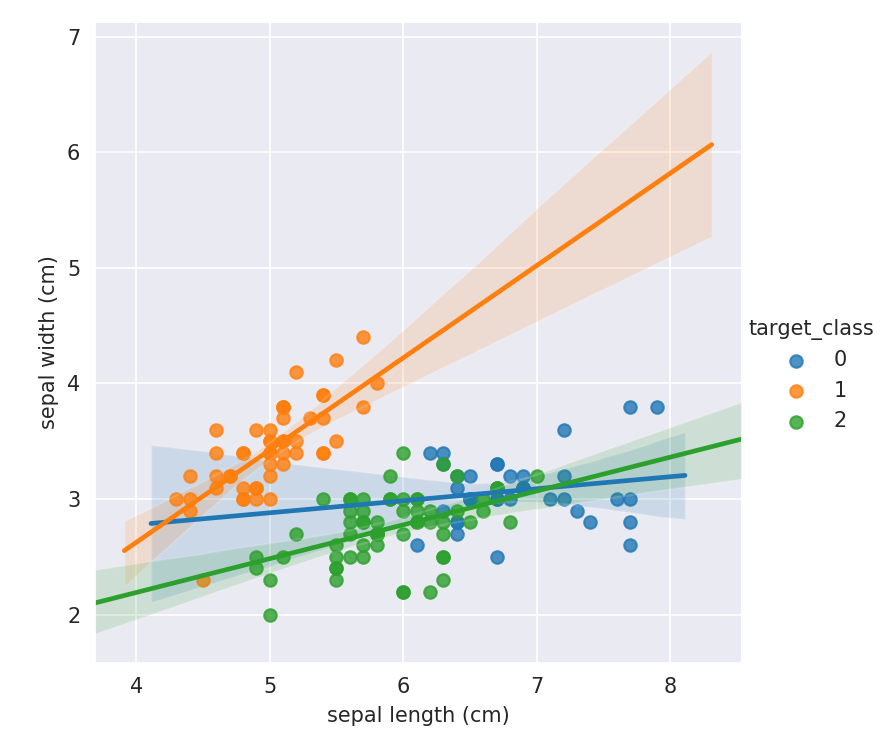

In [12]:
newdata = iris_df
newdata['target_class'] = kmeans.labels_
sns.set_style('darkgrid')
sns.lmplot('sepal length (cm)','sepal width (cm)', data =newdata, hue = 'target_class' )

<IPython.core.display.Javascript object>


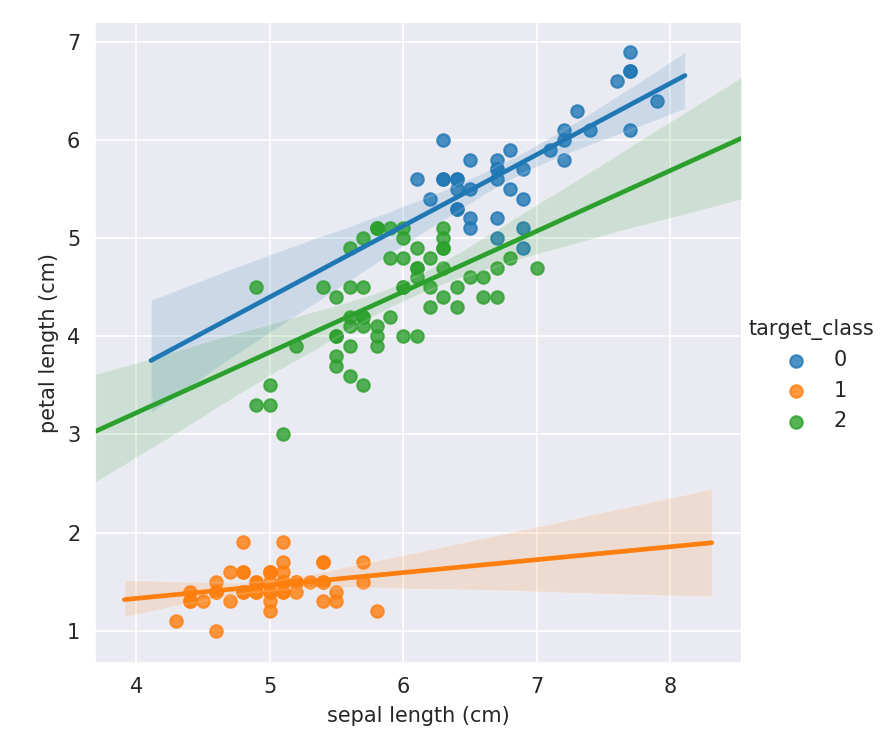

In [13]:
sns.set_style('darkgrid')
sns.lmplot('sepal length (cm)','petal length (cm)', data =newdata, hue = 'target_class' )

<IPython.core.display.Javascript object>


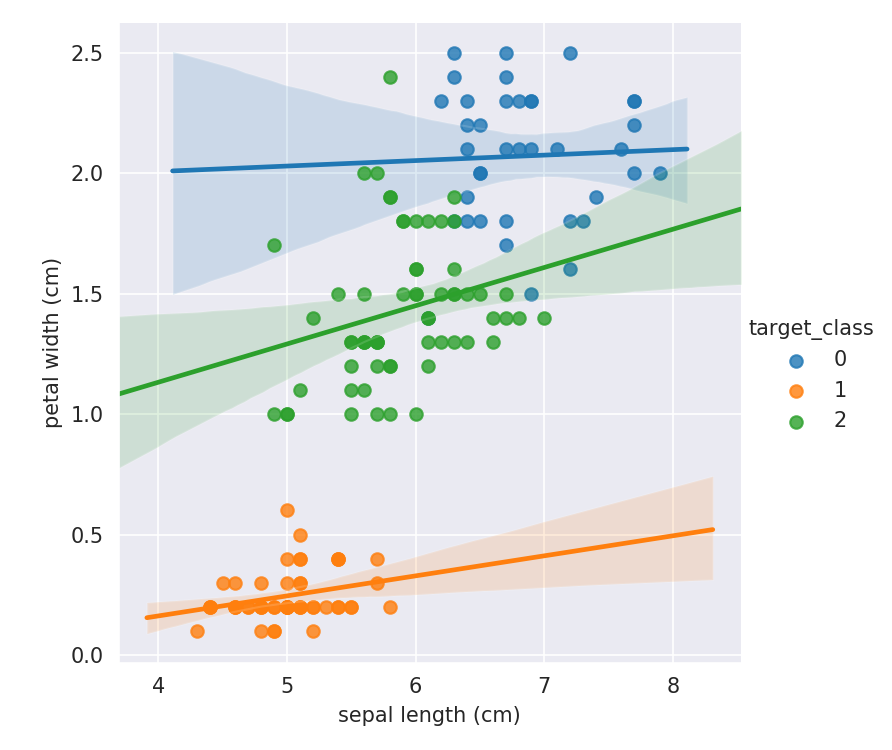

In [14]:
sns.set_style('darkgrid')
sns.lmplot('sepal length (cm)','petal width (cm)', data =newdata, hue = 'target_class' )

**This concludes the K-Means**

# Applying the Tsne for Visualisation of Clusters

tsne done! Time elapsed 0.20860576629638672 seconds


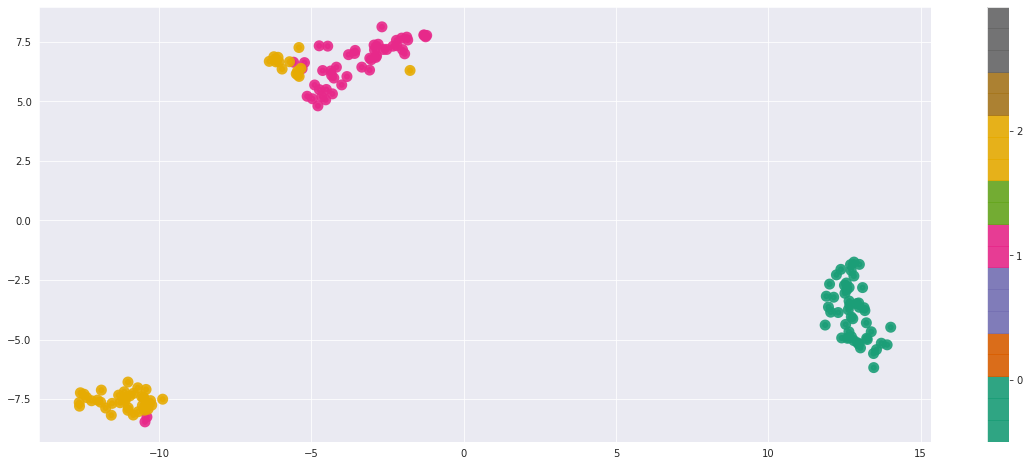

In [15]:
import time
from sklearn.manifold import TSNE
n_sne = 7000
time_start = time.time()
tsne = TSNE(n_iter = 300,perplexity=37)
tsne_result = tsne.fit_transform(iris_df.values)
print('tsne done! Time elapsed {} seconds'.format(time.time()-time_start))

iris_df['label'] = iris.target
%matplotlib inline
fig = plt.figure(figsize=(20,8))
plt.scatter(tsne_result[:,0],tsne_result[:,1],c = iris_df['label'], cmap = plt.cm.get_cmap('Dark2',20),alpha = 0.9,linewidths = 5)
plt.clim(-0.5,3)
plt.colorbar(ticks = range(3))
plt.show()